## Matplotlib
* visualization library for python release
* pyplot module provides Matlab style interface for plotting
* fairly basic plotting

## Seaborn
* build on top of Matplotlib
* extends the functionality with more plots
* better formating
* a bit easier to code, less syntax
* default themes that are a bit better

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

## Line Graph
* https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html
* https://seaborn.pydata.org/generated/seaborn.lineplot.html

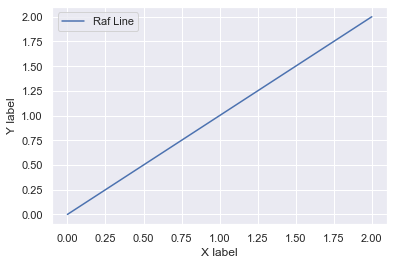

In [2]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='Raf Line')

plt.xlabel('X label')
plt.ylabel('Y label')
#plt.title("Simple Plot")
plt.legend()
plt.show()

* in seaborn you need to put in the x and y

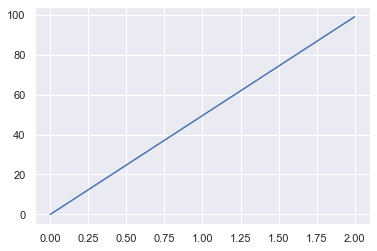

In [3]:
import seaborn as sns; sns.set()
sns.lineplot(x, list(range(len(x))))

## Scatter Plot
* https://seaborn.pydata.org/generated/seaborn.scatterplot.html

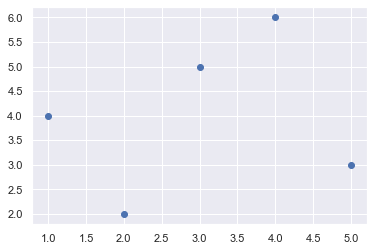

In [4]:
x = [1,2,3,4,5]
y = [4,2,5,6,3]

plt.scatter(x,y)

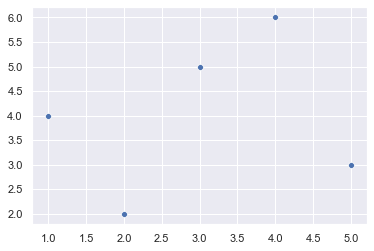

In [5]:
sns.scatterplot(x,y)

## Histogram
* https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
* https://seaborn.pydata.org/generated/seaborn.distplot.html

In [6]:
x = np.random.randint(0,10,100)

(array([ 9., 12., 14.,  9.,  9.,  7.,  7., 14., 14.,  5.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

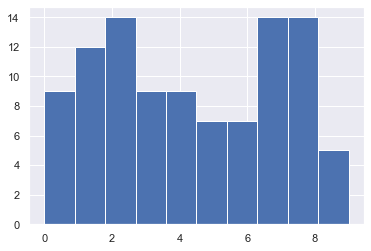

In [7]:
plt.hist(x)

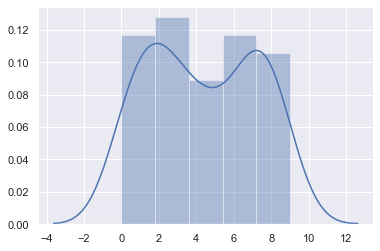

In [8]:
sns.distplot(x)

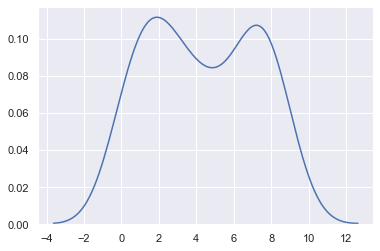

In [9]:
sns.distplot(x, hist = False)

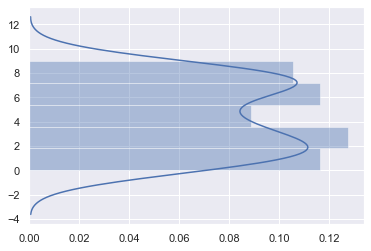

In [10]:
sns.distplot(x, vertical=True)

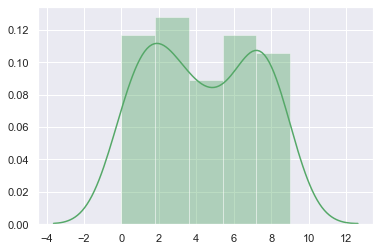

In [11]:
sns.distplot(x, color = "g")

## Bar Graph

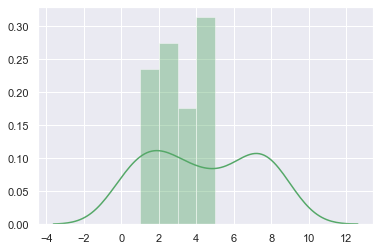

In [12]:
bins = [1,2,3,4,5]
sns.distplot(x, bins, color = "g")

In [13]:
h = ["a","b","c","d"]
x = [8,5,10,11]

<BarContainer object of 4 artists>

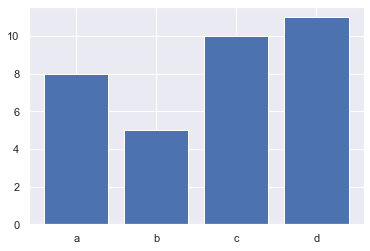

In [14]:
plt.bar(h,x)

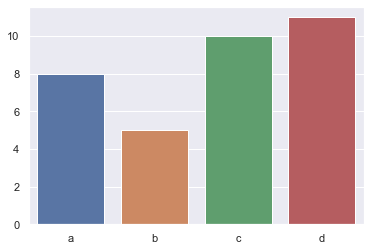

In [15]:
sns.barplot(h,x)

## Categorical Plotting

In [16]:
tips = sns.load_dataset("tips")

In [17]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


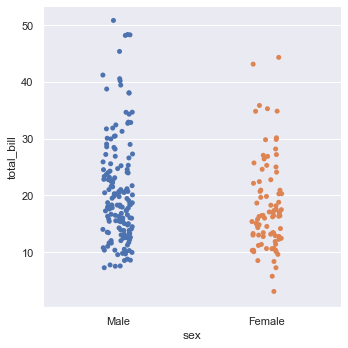

In [18]:
sns.catplot(x="sex", y="total_bill", data=tips)

In [19]:
df = tips[tips["day"] == "Thur"]

C:\Users\raves\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


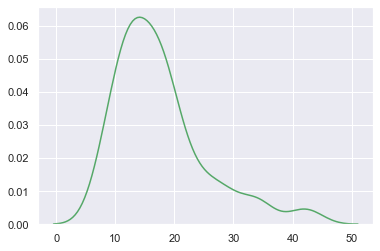

In [20]:
sns.distplot(df["total_bill"].tolist(), bins, color = "g")

## BotPlots

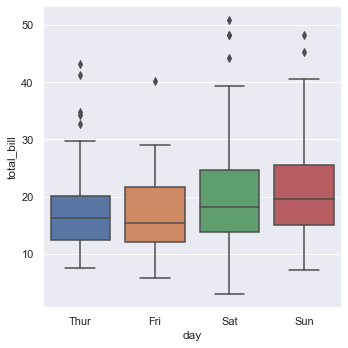

In [21]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

## RelPlot (Correlation Plot)

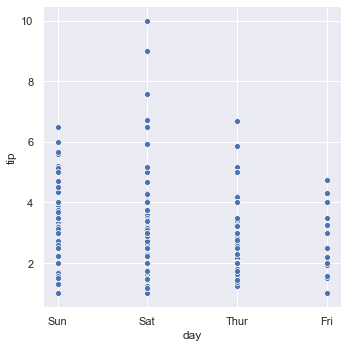

In [22]:
sns.relplot(x="day", y="tip", data=tips)

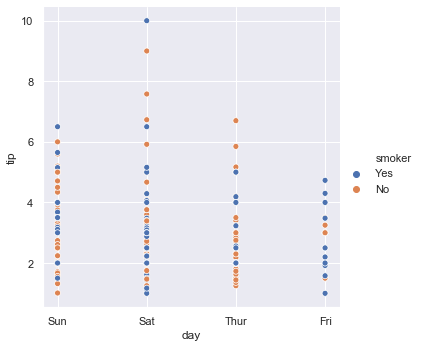

In [23]:
sns.relplot(x="day", y="tip", hue="smoker", data=tips);

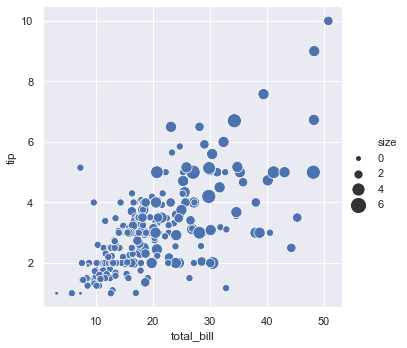

In [24]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

## Regplot (Regression Plot) and Implot
* draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression

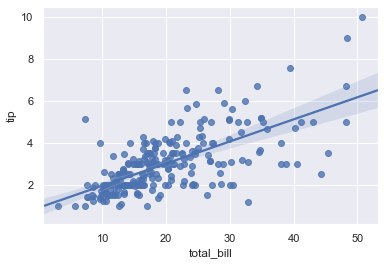

In [25]:
sns.regplot(x="total_bill", y="tip", data=tips);

## Joint Plot
* reg plot with histograms for the x and y

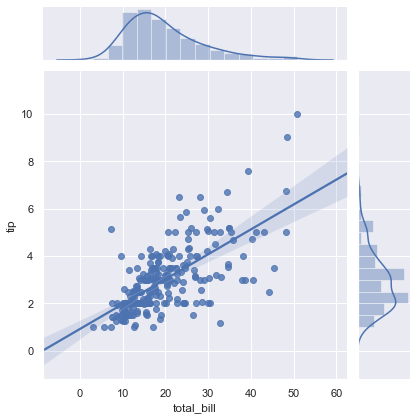

In [26]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

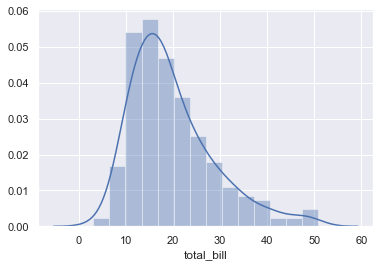

In [27]:
sns.distplot(tips["total_bill"])

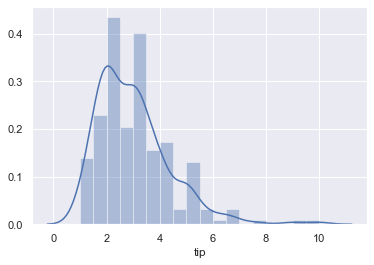

In [28]:
sns.distplot(tips["tip"])

## Saving Figures

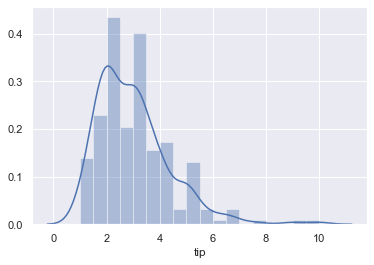

In [29]:
fig = sns.distplot(tips["tip"])

In [47]:
type(fig)

matplotlib.axes._subplots.AxesSubplot

In [48]:
fig1 = fig.get_figure() 
fig1.savefig("test.png")

In [109]:
dir(fig)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

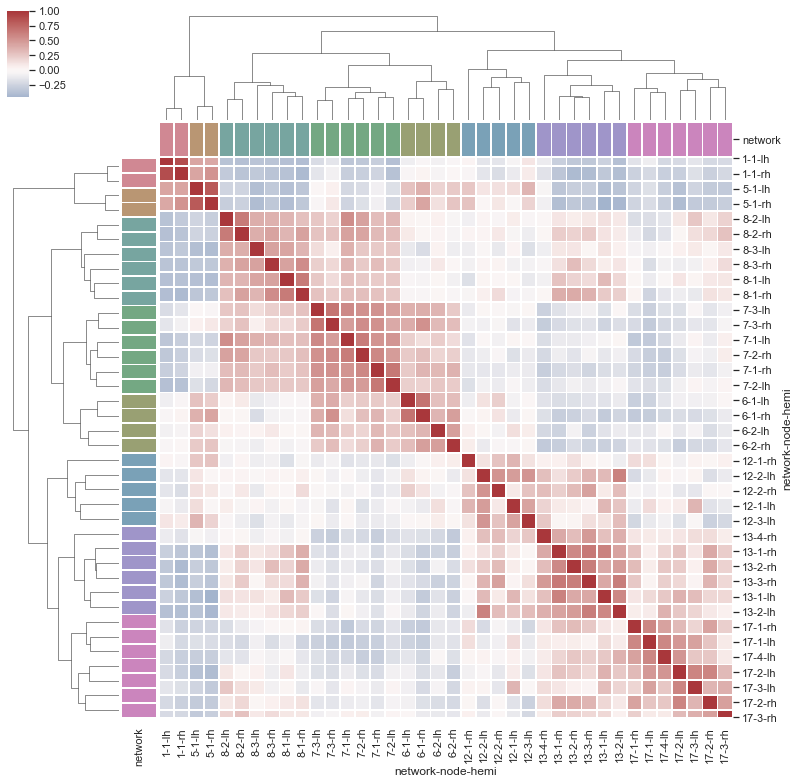

In [50]:
import pandas as pd
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))